In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\tando\Downloads\thyroid0387 (1).data")

In [5]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [6]:
# from pandas.core.describe import DataFrame
df.to_csv("thyroid.csv",index=None)

In [7]:
df=pd.read_csv("thyroid.csv")

In [8]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [9]:
df.drop("other",axis=1,inplace=True)

In [10]:
feature_cols = ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
               "target"]

In [11]:
df.columns = feature_cols

In [12]:
df.to_csv("thyroid.csv",index=None)

# Splitting target

## Now we can check that the target columns as many categorial names with some indicate numbers so going to split with the respective features 

### thyroid.names file content

The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)

In [13]:
target = df.target
create = target.str.split("[^a-zA-Z]+", expand=True)


In [14]:
target = create[0].replace({"":'Z'})

In [15]:
len(target.unique())

30

In [16]:
df['target']=target

In [17]:
df.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [18]:
df.target.value_counts()

Z      6770
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
C        18
MK       16
Q        14
O        14
KJ       11
GI       10
D         9
H         8
FK        6
P         5
MI        2
LJ        1
GKJ       1
OI        1
E         1
Name: target, dtype: int64

### Now we want to impute the null values but this case the null values are marked as in '?' so we can do some tricks

In [19]:
df = df.replace('?',np.nan)

In [20]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

In [21]:
# here we can see the TBG has more null observations it will tremendously occur problem so we can remove and some of the other 
# feautre rows which is not useful

df.drop(['TBG_measured','TBG','T3_measured','TSH measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)


In [22]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64,0.83,77,Z
9167,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91,0.92,99,Z
9168,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113,1.27,89,I
9169,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75,0.85,88,Z


In [23]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        8864 non-null   object
 2   on_thyroxine               9171 non-null   object
 3   query_on_thyroxine         9171 non-null   object
 4   on_antithyroid_medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid_surgery            9171 non-null   object
 8   I131_treatment             9171 non-null   object
 9   query_hypothyroid          9171 non-null   object
 10  query_hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

In [25]:
X=df.drop('target',axis=1)
y=df['target']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6144 entries, 3535 to 7270
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        6144 non-null   int64 
 1   sex                        5930 non-null   object
 2   on_thyroxine               6144 non-null   object
 3   query_on_thyroxine         6144 non-null   object
 4   on_antithyroid_medication  6144 non-null   object
 5   sick                       6144 non-null   object
 6   pregnant                   6144 non-null   object
 7   thyroid_surgery            6144 non-null   object
 8   I131_treatment             6144 non-null   object
 9   query_hypothyroid          6144 non-null   object
 10  query_hyperthyroid         6144 non-null   object
 11  lithium                    6144 non-null   object
 12  goitre                     6144 non-null   object
 13  tumor                      6144 non-null   object
 14  hypop

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        8864 non-null   object
 2   on_thyroxine               9171 non-null   object
 3   query_on_thyroxine         9171 non-null   object
 4   on_antithyroid_medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid_surgery            9171 non-null   object
 8   I131_treatment             9171 non-null   object
 9   query_hypothyroid          9171 non-null   object
 10  query_hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [31]:
X_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
3535,79,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.03,4.1,160,0.78,204
7222,54,NaN,f,f,f,t,f,t,f,f,...,f,f,f,f,f,1.9,2.3,161,1.04,155
5880,40,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.85,NaN,103,0.87,118
3880,68,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.2,2.1,85,NaN,NaN
8339,88,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.5,0.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,52,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,3,NaN,125,0.9,138
5191,54,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.52,NaN,96,0.69,140
5390,58,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.1,2.3,60,0.89,68
860,23,F,f,f,f,f,t,f,f,f,...,f,f,t,f,f,0.1,2.8,201,1.14,176


In [32]:
trf1 = ColumnTransformer(transformers=[
           ('oe',OrdinalEncoder(),['on_thyroxine',
                                     'query_on_thyroxine',
                                     'on_antithyroid_medication',
                                     'sick',
                                     'pregnant',
                                     'thyroid_surgery',
                                     'I131_treatment',
                                     'query_hypothyroid',
                                     'query_hyperthyroid',
                                     'lithium',
                                     'goitre',
                                     'tumor',
                                     'hypopituitary',
                                     'psych']),
        ('onehot', OneHotEncoder(categories='auto', drop='first', sparse=False), ['sex']),

        ('imputer_scaler', make_pipeline(KNNImputer(),MinMaxScaler()), ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']),
            ],remainder='passthrough')

In [33]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('oe', OrdinalEncoder(),
                                 ['on_thyroxine', 'query_on_thyroxine',
                                  'on_antithyroid_medication', 'sick',
                                  'pregnant', 'thyroid_surgery',
                                  'I131_treatment', 'query_hypothyroid',
                                  'query_hyperthyroid', 'lithium', 'goitre',
                                  'tumor', 'hypopituitary', 'psych']),
                                ('onehot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex']),
                                ('imputer_scaler',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'])])

In [34]:
X_train=trf1.fit_transform(X_train)

In [35]:
len(X_train[0])

22

In [36]:
len(X_train)

6144

In [37]:
for i in range(0,len(X_train)):
    print(X_train[i])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.19038535e-03 4.71702563e-05 2.25626741e-01 2.64214047e-01
 2.82407407e-01 2.41881566e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 8.08851583e-04 3.57550543e-03 1.25348189e-01 2.65886288e-01
 4.02777778e-01 1.83381089e-01]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00059519 0.00159435
 0.1086351  0.16889632 0.32407407 0.13920726]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 9.15681038e-04 4.42041902e-02 1.19777159e-01 2.16387960e-01
 3.65740741e-01 1.42908309e-01]
[0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.01244351
 0.09192201 0.11036789 0.31759259 0.10506208]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00051889 0.00376419
 0.17548747 0.24080268 0.47685185 0.14398281]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.54635635e-04 5.84816838e-02 2.25626741e-01 3.81270903e-01
 8.47222222e-01 1.35625597e-01]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00108356 0.0016887
 0.07520891 0.16053512 0.30092593 0.14159503]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.00111408 0.00357551
 0.11420613 0.13879599 0.38888889 0.09861509]
[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.96795116e-04 2.73587487e-04 1.53203343e-01 3.29431438e-01
 5.97222222e-01 1.61891117e-01]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00059519 0.00136794
 0.1086351  0.19899666 0.39351852 0.13920726]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.95192675e-04 2.25473825e-03 1.35376045e-01 2.59197324e-01
 6.25000000e-01 1.21298949e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0

 0.07520891 0.17558528 0.41666667 0.11771729]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
 5.03624571e-04 2.63210030e-03 1.19777159e-01 1.90635452e-01
 3.28703704e-01 1.55921681e-01]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00099199 0.00848121
 0.02506964 0.13545151 0.27777778 0.12726839]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00057993 0.00055661
 0.15988858 0.20869565 0.35740741 0.17717287]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.69896986e-04 5.56609025e-04 1.69916435e-01 2.49163880e-01
 5.69444444e-01 1.27268386e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.15986265e-03 1.41510769e-04 1.36490251e-01 3.44481605e-01
 3.19444444e-01 2.87249284e-01]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00083937 0.00300946
 0.09526462 0.2458194  0.41203704 0.16547278]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0

 3.70370370e-01 1.17717287e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.63067531e-04 2.63210030e-03 1.34261838e-01 2.44147157e-01
 4.16666667e-01 1.63085005e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.91987791e-04 1.26321946e-02 1.05292479e-01 9.03010033e-02
 2.59259259e-01 9.02578797e-02]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00111408 0.00459438
 0.10306407 0.16053512 0.41203704 0.10816619]
[0.         0.         0.         0.         0.         0.
 0. 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00082411 0.02074548
 0.08077994 0.23745819 0.49537037 0.13681948]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.27317818e-04 2.21700205e-03 2.14484680e-01 2.44147157e-01
 5.87962963e-01 1.21298949e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.24112934e-04 1.23586072e-03 9.63788301e-02 2.15719064e-01
 4.12037037e-01 1.46370583e-01]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

 0.01949861 0.07525084 0.3287037  0.06160458]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 2.44181610e-04 2.44341928e-03 8.74651811e-02 1.20401338e-01
 2.77777778e-01 1.12941738e-01]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.89965662e-04 1.79246974e-04 1.03064067e-01 1.80602007e-01
 3.47222222e-01 1.41595033e-01]
[0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00115986 0.005651
 0.14206128 0.18729097 0.3287037  0.15353391]
[0.         0.         0.         0.         0.    

In [38]:
X_test=trf1.transform(X_test)

In [39]:
d=pd.DataFrame(X_test)

In [40]:
feature_cols = ['on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych']

In [41]:
d[10].value_counts()

0.0    3003
1.0      24
Name: 10, dtype: int64

In [42]:
d.columns

RangeIndex(start=0, stop=22, step=1)

In [43]:
for i in d.columns:
    print(d[i].value_counts())

0.0    2591
1.0     436
Name: 0, dtype: int64
0.0    2974
1.0      53
Name: 1, dtype: int64
0.0    2981
1.0      46
Name: 2, dtype: int64
0.0    2914
1.0     113
Name: 3, dtype: int64
0.0    2996
1.0      31
Name: 4, dtype: int64
0.0    2975
1.0      52
Name: 5, dtype: int64
0.0    2967
1.0      60
Name: 6, dtype: int64
0.0    2820
1.0     207
Name: 7, dtype: int64
0.0    2797
1.0     230
Name: 8, dtype: int64
0.0    2989
1.0      38
Name: 9, dtype: int64
0.0    3003
1.0      24
Name: 10, dtype: int64
0.0    2943
1.0      84
Name: 11, dtype: int64
0.0    3026
1.0       1
Name: 12, dtype: int64
0.0    2880
1.0     147
Name: 13, dtype: int64
0.0    2056
1.0     971
Name: 14, dtype: int64
0.0    2934
1.0      93
Name: 15, dtype: int64
0.000885    78
0.000900    70
0.001099    66
0.000870    66
0.001084    65
            ..
0.001389     1
0.000122     1
0.000046     1
0.000076     1
0.000107     1
Name: 16, Length: 95, dtype: int64
0.000179    99
0.002443    84
0.002066    79
0.002632    7

In [44]:
d.shape


(3027, 22)

In [45]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.0735786 , 0.16666667,
        0.10100287],
       [0.        , 0.        , 0.        , ..., 0.15551839, 0.35185185,
        0.12010506],
       [0.        , 0.        , 0.        , ..., 0.14715719, 0.20833333,
        0.17144222],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20568562, 0.36111111,
        0.15592168],
       [0.        , 0.        , 0.        , ..., 0.23578595, 0.39351852,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 0.20234114, 0.41666667,
        0.1356256 ]])

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rf = rf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7403369672943508

In [51]:
y_pred_train=rf.predict(X_train)

accuracy_score(y_pred_train,y_train)

0.7373046875

In [72]:
knn = KNeighborsClassifier()

In [79]:
def get_best_params_for_KNN(train_x, train_y):

    print('Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class')

            # initializing with different combination of parameters
        
    param_grid_knn = {
                'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : [10,17,24,28,30,35],
                'n_neighbors':[4,5,8,10,11],
                'p':[1,2]
            }

            # Creating an object of the Grid Search class
    grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, verbose=3,
                                     cv=5)
            # finding the best parameters
    grid.fit(train_x, train_y)

            # extracting the best parameters
    algorithm = grid.best_params_['algorithm']
    leaf_size = grid.best_params_['leaf_size']
    n_neighbors = grid.best_params_['n_neighbors']
    p  = grid.best_params_['p']

            # creating a new model with the best parameters
    knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors,p=p,n_jobs=-1)
            # training the mew model
    knn.fit(train_x, train_y)
#         print('KNN best params: ' + str(grid.best_params_) + '. Exited the KNN method of the Model_Finder class')
    return knn


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn= get_best_params_for_KNN(X_train,y_train)

Entered the get_best_params_for_Ensembled_KNN method of the Model_Finder class
Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\tando\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.800 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.814 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.812 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.823 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1;, score=0.809 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.796 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.809 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.809 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.819 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2;, score=0.809 total time=   0.1s


[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.812 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.817 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=1;, score=0.800 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.807 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.810 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.814 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.818 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=10, p=2;, score=0.799 total time=   0.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.801 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=11, p=1;, score=0.810 total tim

[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=1;, score=0.809 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.796 total time=   0.3s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.806 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.824 total time=   0.2s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.816 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=5, p=2;, score=0.803 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.802 total time=   0.2s
[CV 2/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.811 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.818 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=28, n_neighbors=8, p=1;, score=0.814 total time=   0.3s


[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.809 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.815 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.812 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2;, score=0.801 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.800 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.814 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.812 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.823 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1;, score=0.809 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=2;, score=0.796 total time=   0

[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=8, p=2;, score=0.795 total time=   0.5s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.806 total time=   0.4s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.810 total time=   0.4s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.812 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.817 total time=   0.4s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=1;, score=0.800 total time=   0.4s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.807 total time=   0.5s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.810 total time=   0.5s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.814 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, n_neighbors=10, p=2;, score=0.818 total time=   0.2s
[CV 5/5] EN

[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1;, score=0.812 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=1;, score=0.809 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.796 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.806 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.824 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.816 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=5, p=2;, score=0.803 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.802 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.811 total time=   0.2s
[CV 3/5] END algorithm=kd_tree, leaf_size=24, n_neighbors=8, p=1;, score=0.818 total time=   0.1s
[CV 4/5] END algorit

[CV 3/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.815 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.812 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=28, n_neighbors=11, p=2;, score=0.801 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.800 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.814 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.812 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.823 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1;, score=0.809 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.797 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2;, score=0.809 total time=   0.2s
[CV 3/5] END algo

[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.810 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.812 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.817 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1;, score=0.800 total time=   0.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.807 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.810 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.814 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.818 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2;, score=0.799 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=35, n_neighbors=11, p=1;, score=0.801 total time=   0.1s
[CV 2/5] E

[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.806 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.825 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.816 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=5, p=2;, score=0.803 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.802 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.811 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.818 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.814 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=1;, score=0.798 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=8, p=2;, score=0.801 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=

[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.812 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.823 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=1;, score=0.809 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.796 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.809 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.809 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.819 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=28, n_neighbors=4, p=2;, score=0.808 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.807 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=28, n_neighbors=5, p=1;, score=0.807 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=

[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=10, p=2;, score=0.818 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=10, p=2;, score=0.799 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.801 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.810 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.814 total time=   0.2s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.808 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=1;, score=0.802 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.806 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.809 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11, p=2;, score=0.815 total time=   0.2s
[CV 4/5] END algorithm=brute, 

In [85]:
prediction_knn = knn.predict(X_test)

In [86]:
accuracy_score(y_test, prediction_knn)

0.8166501486620417

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [204]:
def get_best_params_for_random_forest(train_x,train_y):
        """
                                Method Name: get_best_params_for_random_forest
                                Description: get the parameters for Random Forest Algorithm which give the best accuracy.
                                             Use Hyper Parameter Tuning.
                                Output: The model with the best parameters
                                On Failure: Raise Exception

        """
        print('Entered the get_best_params_for_random_forest method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}

            clf = RandomForestClassifier()
        
            #Creating an object of the Grid Search class
            grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
            #finding the best parameters
            grid.fit(train_x, train_y)

            #extracting the best parameters
            criterion = grid.best_params_['criterion']
            max_depth = grid.best_params_['max_depth']
            max_features = grid.best_params_['max_features']
            n_estimators = grid.best_params_['n_estimators']

            #creating a new model with the best parameters
            clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                              max_depth=max_depth, max_features=max_features)
            # training the mew model
            clf.fit(train_x, train_y)
            
            print('Random Forest best params: '+str(f"{grid.best_params_}")+'. Exited the get_best_params_for_random_forest method of the Model_Finder class')

            return clf
        except Exception as e:
            raise Exception()

In [205]:
random_forest_classifier = get_best_params_for_random_forest(X_train,y_train)

Entered the get_best_params_for_random_forest method of the Model_Finder class
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.736 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_feat

[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.737 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.737 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.737 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.740 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.738 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.738 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.736 total time=   0.3s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.737 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.737 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.737 total time=   0.3s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=130;, score=0.739 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, n_estimators=50;, score=0.737 total time=   0.0s
[CV 4/5] 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.753 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.751 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=50;, score=0.753 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.747 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.752 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.754 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.752 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.755 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.748 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.753 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.753 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.752 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.752 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.752 total time=   0.0s
[CV 4/5] 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.737 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.737 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.738 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.736 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.737 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.737 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.737 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=100;, score=0.738 total time=   0.1s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.736 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.737 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.737 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.737 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=130;, score=0.738 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.737 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=50;, score=0.737 t

C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.753 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.747 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.752 total time=   0.0s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.746 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.752 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.752 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.750 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.752 total time=   0.3s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.746 total time=   0.4s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.752 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.752 total time=   0.2s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.750 total time=   0.3s


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.752 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.752 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.752 t

In [207]:
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=10)

In [208]:
y_predict_train = random_forest_classifier.predict(X_train)

In [209]:
y_pred_test=random_forest_classifier.predict(X_test)

In [210]:
accuracy_score(y_train,y_predict)

0.9952799479166666

In [211]:
 accuracy_score(y_test,y_pred_test)

0.7509084902543772

In [380]:
dtt=DecisionTreeClassifier(ccp_alpha= 0.001, criterion= 'gini', max_depth= 8, max_features= 'auto', min_samples_split= 4)

In [381]:
dtt.fit(X_train,y_train)

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       min_samples_split=4)

In [386]:
y_predict_train = dtt.predict(X_train)

In [387]:
y_pred_test=dtt.predict(X_test)

In [388]:
accuracy_score(y_train,y_predict_train)

0.8269856770833334

In [389]:
 accuracy_score(y_test,y_pred_test)

0.800792864222002

In [374]:
def get_best_params_DT(train_x,train_y):
        """
                                Method Name: get_best_params_for_random_forest
                                Description: get the parameters for Random Forest Algorithm which give the best accuracy.
                                             Use Hyper Parameter Tuning.
                                Output: The model with the best parameters
                                On Failure: Raise Exception

        """
        print('Entered the get_best_params_for_random_forest method of the Model_Finder class')
        try:
            # initializing with different combination of parameters
            param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
                                  'ccp_alpha': [0.1, .01, .001],
                                  'max_depth' : [5, 6, 7, 8, 9],
                                  'criterion' :['gini', 'entropy'],
                                  'min_samples_split':[2, 3, 4]
    
                                 }

            clf = DecisionTreeClassifier()
        
            #Creating an object of the Grid Search class
            grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,  verbose=3)
            #finding the best parameters
            grid.fit(train_x, train_y)

            #extracting the best parameters
            criterion = grid.best_params_['criterion']
            max_depth = grid.best_params_['max_depth']
            max_features = grid.best_params_['max_features']
#            n_estimators = grid.best_params_['n_estimators']
            min_samples_split = grid.best_params_['min_samples_split']

            #creating a new model with the best parameters
            dt = DecisionTreeClassifier(criterion=criterion,
                                              max_depth=max_depth, max_features=max_features,min_samples_leaf=1,
                                               min_samples_split=min_samples_split)
            # training the mew model
            dt.fit(train_x, train_y)
            
            print('Decision Tree: '+str(f"{grid.best_params_}")+'. Exited the get_best_params_for_random_forest method of the Model_Finder class')

            return clf
        except Exception as e:
            raise Exception()

In [ ]:
# so for 8 as max_depth it is showing good accuracy

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8)
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)


0.8893293690122234

In [54]:

y_pred_train=clf.predict(X_train)

accuracy_score(y_pred_train,y_train)

0.92822265625

In [375]:
dt = get_best_params_DT(X_train,y_train)

Entered the get_best_params_for_random_forest method of the Model_Finder class
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_samples_split=3;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto, min_sam

C:\Users\tando\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_class

[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2, min_samples_split=2;,

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2;,

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;,

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2;,

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=9, max_features=auto, min_samples_split=3;,

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3;, score=0.747 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.797 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.767 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.751 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.738 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqr

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2;, score=0.751 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2;, score=0.772 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3;, score=0.779 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3;, score=0.768 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3;, score=0.770 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=3;, score=0.794 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=6, max_features=aut

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2;, score=0.774 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3;, score=0.753 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3;, score=0.753 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=aut

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.771 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.749 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.740 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.764 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=3;, score=0.765 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=3;, score=0.782 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqr

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=3;, score=0.756 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=3;, score=0.785 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4;, score=0.765 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4;, score=0.776 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4;, score=0.754 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=9, max_features=sqr

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.736 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.788 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3;, score=0.800 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3;, score=0.812 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=5, max_features=sqrt, min_samples_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.771 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.804 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.809 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto, min_samples_split=4;, score=0.796 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.760 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.779 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, min_samples_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.834 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.801 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.739 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.785 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.797 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=2;, score=0.759 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt, min_samples_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.793 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.807 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.797 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.797 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.798 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, min_samples_split=2;, score=0.760 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, min_samples_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.800 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.796 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.818 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.761 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.754 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt, min_samples_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.801 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.802 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.785 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.779 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.823 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.780 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.779 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=5, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.810 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.810 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.814 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.803 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.830 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.845 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.793 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3;, score=0.792 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3;, score=0.814 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.787 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.832 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.820 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.850 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.794 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=7, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=2;, score=0.816 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.830 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.804 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.780 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.845 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.836 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4;, score=0.797 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto, min_samples_split=4;, score=0.845 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.828 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.831 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.823 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.838 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.850 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3;, score=0.801 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3;, score=0.790 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3;, score=0.813 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.817 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.788 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.791 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.799 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=4;, score=0.786 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2, min_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2;, score=0.823 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=2;, score=0.835 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3;, score=0.806 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3;, score=0.818 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3;, score=0.802 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3;, score=0.800 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_samples_split=3;, score=0.780 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=auto, min_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3;, score=0.814 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3;, score=0.817 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3;, score=0.844 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3;, score=0.825 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=3;, score=0.836 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.827 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_samples_split=4;, score=0.804 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto, min_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3;, score=0.851 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=3;, score=0.862 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.836 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.847 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.810 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.827 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=auto, min_samples_split=4;, score=0.799 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=8, max_features=sqrt, min_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.847 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.838 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.858 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.870 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=auto, min_samples_split=4;, score=0.856 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.806 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.833 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt, min_s

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.791 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.787 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.772 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.778 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=auto, min_samples_split=4;, score=0.794 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=2;, score=0.794 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=5, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.802 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.801 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.822 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=auto, min_samples_split=4;, score=0.831 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.798 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2;, score=0.816 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3;, score=0.823 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=3;, score=0.811 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.852 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.851 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.832 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.860 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto, min_samples_split=4;, score=0.818 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.818 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.808 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.830 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.849 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=3;, score=0.849 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4;, score=0.810 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=8, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.831 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=2;, score=0.858 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3;, score=0.802 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3;, score=0.861 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3;, score=0.801 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3;, score=0.801 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=3;, score=0.849 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=9, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [376]:
from sklearn.metrics import accuracy_score

In [377]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [358]:
y_predict_train = dt.predict(X_train)

In [359]:
y_pred_test=dt.predict(X_test)

In [362]:
accuracy_score(y_train,y_predict_train)

0.9952799479166666

In [361]:
 accuracy_score(y_test,y_pred_test)

0.884373967624711

In [ ]:
# so for 8 as max_depth it is showing good accuracy

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8)
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)


0.8893293690122234

In [54]:

y_pred_train=clf.predict(X_train)

accuracy_score(y_pred_train,y_train)

0.92822265625

In [130]:
def get_best_params_for_xgboost(train_x,train_y):
    """
                                      Method Name: get_best_params_for_xgboost
                                      Description: get the parameters for XGBoost Algorithm which give the best accuracy.
                                      Use Hyper Parameter Tuning.

                                      Output: The model with the best parameters
                                      On Failure: Raise Exception
                              
   """

 
    print('Entered the get_best_params_for_xgboost method of the Model_Finder class')
    try:
     # initializing with different combination of parameters
        param_grid = {
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [50, 100, 200],
            'objective': ['multi:softmax', 'multi:softprob'],
#             'num_class': [40] # replace 3 with the number of classes in your problem
             'missing': [24]
        }

     # Creating an object of the Grid Search class
        grid=GridSearchCV(XGBClassifier(), param_grid, verbose=3,cv=5)
     # finding the best parameters
        grid.fit(train_x, train_y)
    
     # extracting the best parameters
        learning_rate = grid.best_params_['learning_rate']
        max_depth = grid.best_params_['max_depth']
        n_estimators = grid.best_params_['n_estimators']
    
     # creating a new model with the best parameters
        xgb = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
     # training the mew model
        xgb.fit(train_x, train_y)
        print('XGBoost best params: ' + str(f"{grid.best_params_}") + '. Exited the get_best_params_for_xgboost method of the Model_Finder class')
            

        return xgb
    except Exception as e:
        raise Exception()

     


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import xgboost as xgb

In [164]:
xgb_model = xgb.XGBClassifier()

# Define the hyperparameters to be tuned
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'classes':[range(30)],
    'missing': [5]
    
}

In [165]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(xgb_model, parameters, scoring='accuracy', n_jobs=-1, cv=5)

In [166]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


C:\Users\tando\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
exception calling callback for <Future at 0x1b08b683cd0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\tando\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\tando\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\tando\anaconda3\lib\site-packages\xgboost\sklearn.py", line 178, in __setstate__
    bst = state["_Booster"]
KeyError: '_Booster'
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\tando\anaconda3\lib\site-packages\

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
y=le.fit_transform(y)

In [162]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [168]:
xgb = get_best_params_for_xgboost(X_train,y_train)

Entered the get_best_params_for_xgboost method of the Model_Finder class
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob;, score=nan total time=   0.0s
[CV 2/5] END classes=ran

C:\Users\tando\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=100, objective=multi:softprob;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=200, objective=multi:softmax;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=200, objective=multi:softmax;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=200, objective=multi:softmax;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=200, objective=multi:softmax;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=200, objective=multi:softmax;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.01, max_depth=6, n_estimators=200, objective=multi:softprob;, score=nan total time=   0.0s
[CV 2/5] EN

[CV 1/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softmax;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softmax;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softmax;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softmax;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softmax;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softprob;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.1, max_depth=9, n_estimators=100, objective=multi:softprob;, score=nan total time=   0.0s
[CV 3/5] END class

Exception: 

In [119]:
from xgboost import XGBClassifier

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
le=LabelEncoder()

In [59]:
y_train = le.fit_transform(y)

In [ ]:
y_train

In [172]:
def get_best_params_for_xgboost(train_x,train_y):
    """
                                      Method Name: get_best_params_for_xgboost
                                      Description: get the parameters for XGBoost Algorithm which give the best accuracy.
                                      Use Hyper Parameter Tuning.

                                      Output: The model with the best parameters
                                      On Failure: Raise Exception
                              
   """




        
    print('Entered the get_best_params_for_xgboost method of the Model_Finder class')
    try:
     # initializing with different combination of parameters
        param_grid_xgboost = {
    
                 'learning_rate': [0.5, 0.1, 0.01, 0.001],
                 'max_depth': [3, 5, 10, 20],
                 'n_estimators': [10, 50, 100, 200],
             'classes': [range(30)]
    
             }
     # Creating an object of the Grid Search class
        grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5)
     # finding the best parameters
        grid.fit(train_x, train_y)
    
     # extracting the best parameters
        learning_rate = grid.best_params_['learning_rate']
        max_depth = grid.best_params_['max_depth']
        n_estimators = grid.best_params_['n_estimators']
    
     # creating a new model with the best parameters
        xgb = XGBClassifier(learning_rate=1, max_depth=5, n_estimators=50)
     # training the mew model
        xgb.fit(train_x, train_y)
        print('XGBoost best params: ' + str(f"{grid.best_params_}") + '. Exited the get_best_params_for_xgboost method of the Model_Finder class')
            

        return xgb
    except Exception as e:
        raise Exception()

In [173]:

xgb_classifier = get_best_params_for_xgboost(X_train,y_train)

Entered the get_best_params_for_xgboost method of the Model_Finder class
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.5, max_depth=3, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END classes=range(0, 30), learning_rate=0.5, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.5, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.5, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.5, max_depth=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.5, max_depth=20, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.5, max_depth=20, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.5, max_depth=20, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.5, max_depth=20, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.5, max_depth=20, n_estima

[CV 1/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.01, max_depth=3, n_es

[CV 3/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END classes=range(0, 30), learning_rate=0.001, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END classes=range(0, 30), learning_rate=0.001, max

Exception: 

In [65]:
random_forest_classifier.score(X_test,y_test)

0.762801453584407

In [803]:
d=[40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.5,1.4,55,1.02,86]

In [804]:
len(d)

21

In [805]:
import numpy as np

In [806]:
np.array(d)

array([40.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.5 ,  1.4 ,
       55.  ,  1.02, 86.  ])

In [807]:
transform


ColumnTransformer(remainder='passthrough',
                  transformers=[('oe', OrdinalEncoder(),
                                 ['on_thyroxine', 'query_on_thyroxine',
                                  'on_antithyroid_medication', 'sick',
                                  'pregnant', 'thyroid_surgery',
                                  'I131_treatment', 'query_hypothyroid',
                                  'query_hyperthyroid', 'lithium', 'goitre',
                                  'tumor', 'hypopituitary', 'psych']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['sex']),
                                ('imputer_scaler',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'])])

# Exploratory Data Analysis

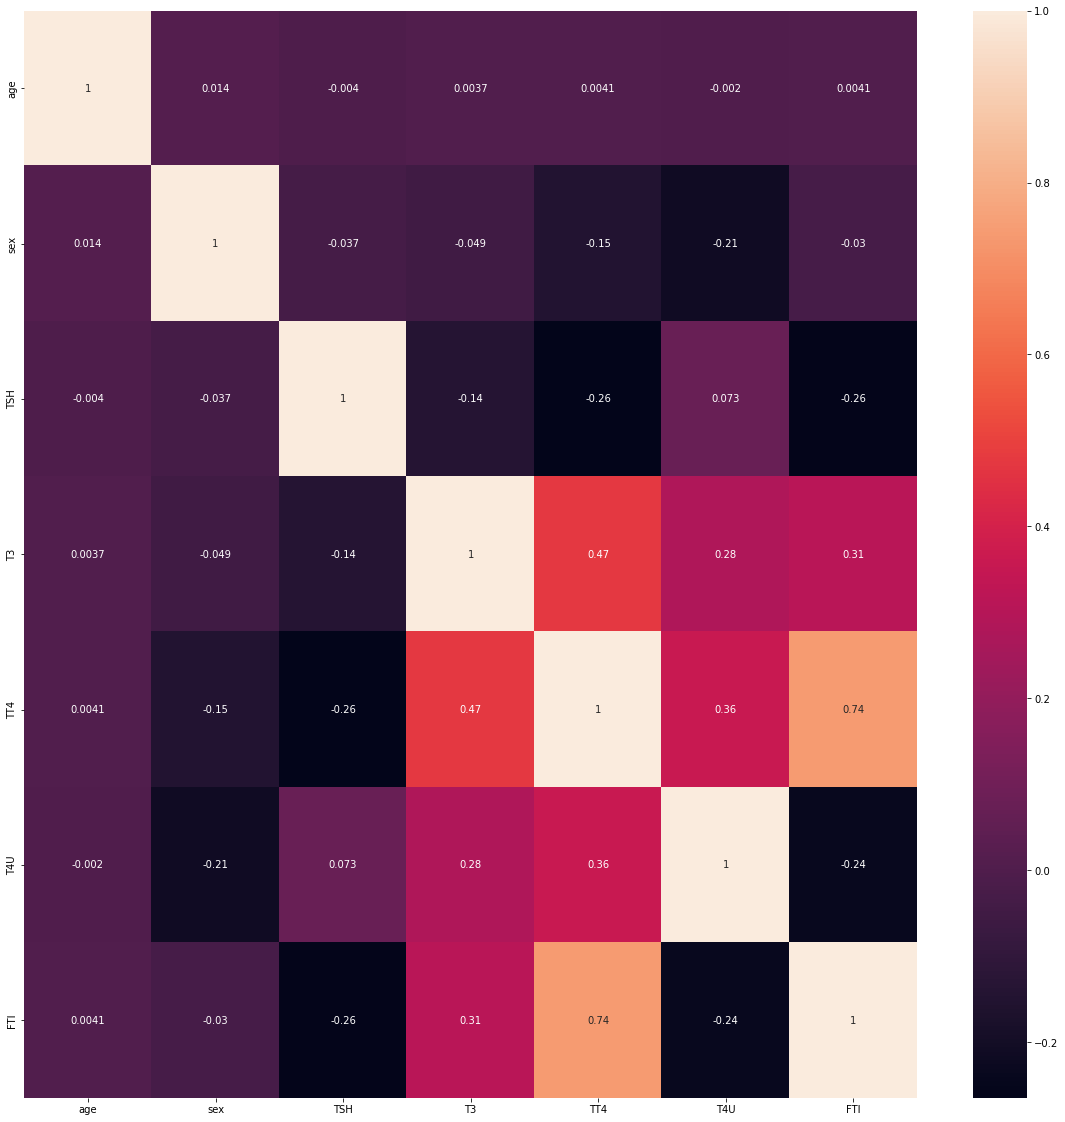

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,0.014175,-0.003979,0.003693,0.004122,-0.002045,0.004108
sex,0.014175,1.000000,-0.036723,-0.048890,-0.150479,-0.214723,-0.030149
TSH,-0.003979,-0.036723,1.000000,-0.136613,-0.264756,0.072962,-0.257901
T3,0.003693,-0.048890,-0.136613,1.000000,0.471792,0.281336,0.312401
TT4,0.004122,-0.150479,-0.264756,0.471792,1.000000,0.362280,0.738279
T4U,-0.002045,-0.214723,0.072962,0.281336,0.362280,1.000000,-0.238927
FTI,0.004108,-0.030149,-0.257901,0.312401,0.738279,-0.238927,1.000000


In [ ]:
# we can't find corr for all variable because some of the features are in categorial object so we want to do label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        9171 non-null   float64
 2   on_thyroxine               9171 non-null   object 
 3   query_on_thyroxine         9171 non-null   object 
 4   on_antithyroid_medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid_surgery            9171 non-null   object 
 8   I131_treatment             9171 non-null   object 
 9   query_hypothyroid          9171 non-null   object 
 10  query_hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

In [ ]:
df.target.dtype

dtype('O')

In [ ]:
cols= [col for col in df.columns if df[col].dtype=='O']

In [ ]:
cols

['on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'target']

In [ ]:
for i in cols:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [ ]:
len(df.columns)

22

In [ ]:
for a in range(1):
  print(a)

0


In [ ]:
# now we can see their is correlation in some features
for a in range(len(df.columns)):
  for b in range(a):    
                            # for b in range(0) will not return anything so it will start when a=1 bcz range(num) se ek pehle tak ka number hi loop me jayega
      if((df.corr().iloc[a,b]) >= 0.7):  
                            # so it will not go till diagonal values of dataset
          print(df.corr().columns[b])


TT4


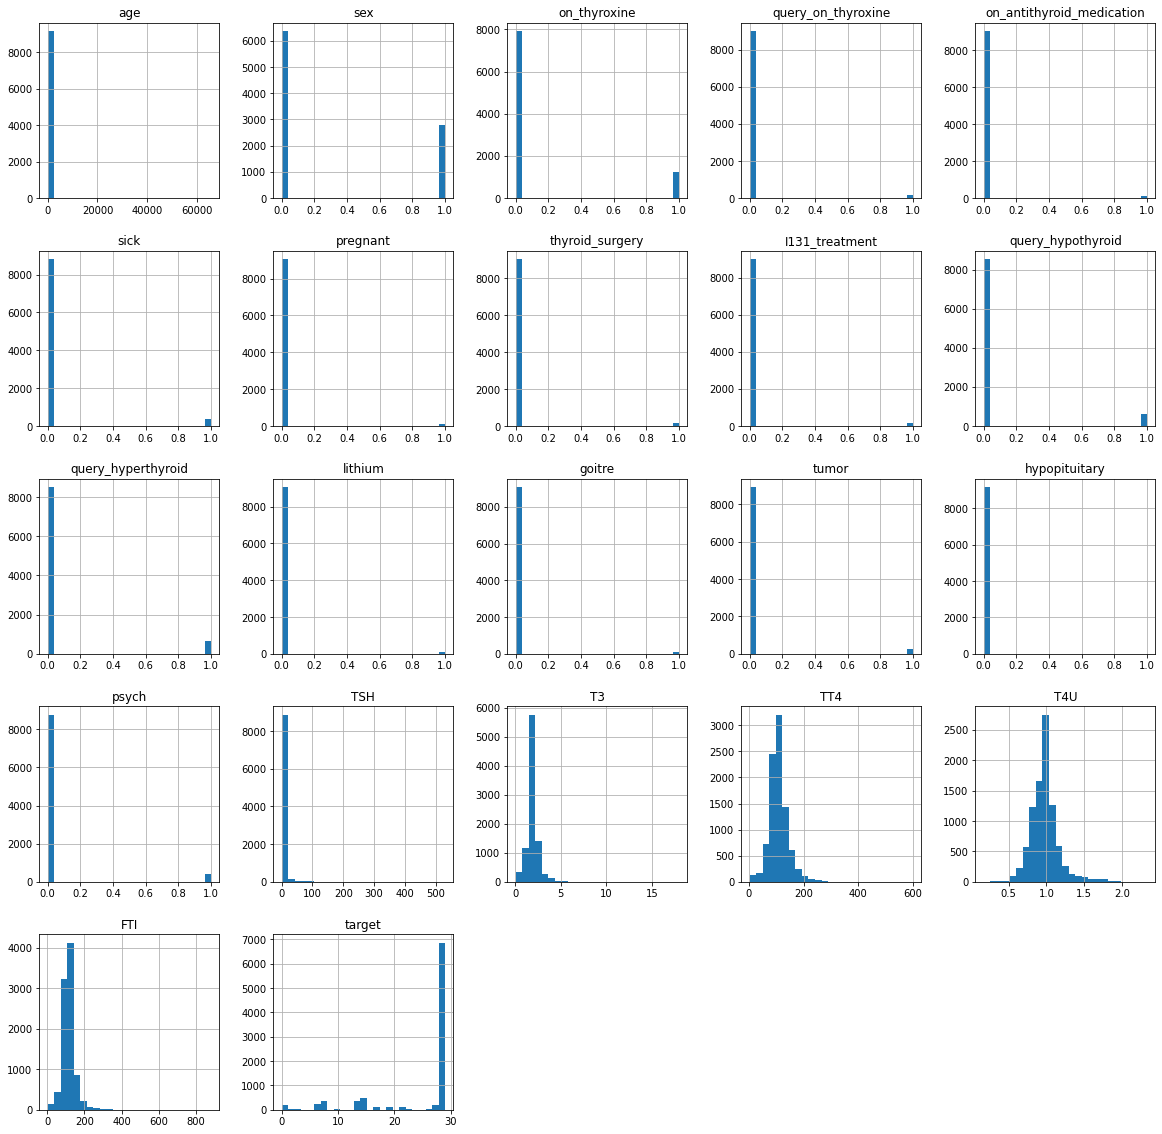

In [ ]:
df.hist(bins=25,figsize=(20,20));

In [ ]:
# So here also FTI and TT4 are resembling the same type of histogram so we will drop 

In [ ]:
# so TT4 has high correlation among all we can remove

df.drop('TT4',axis=1,inplace=True)

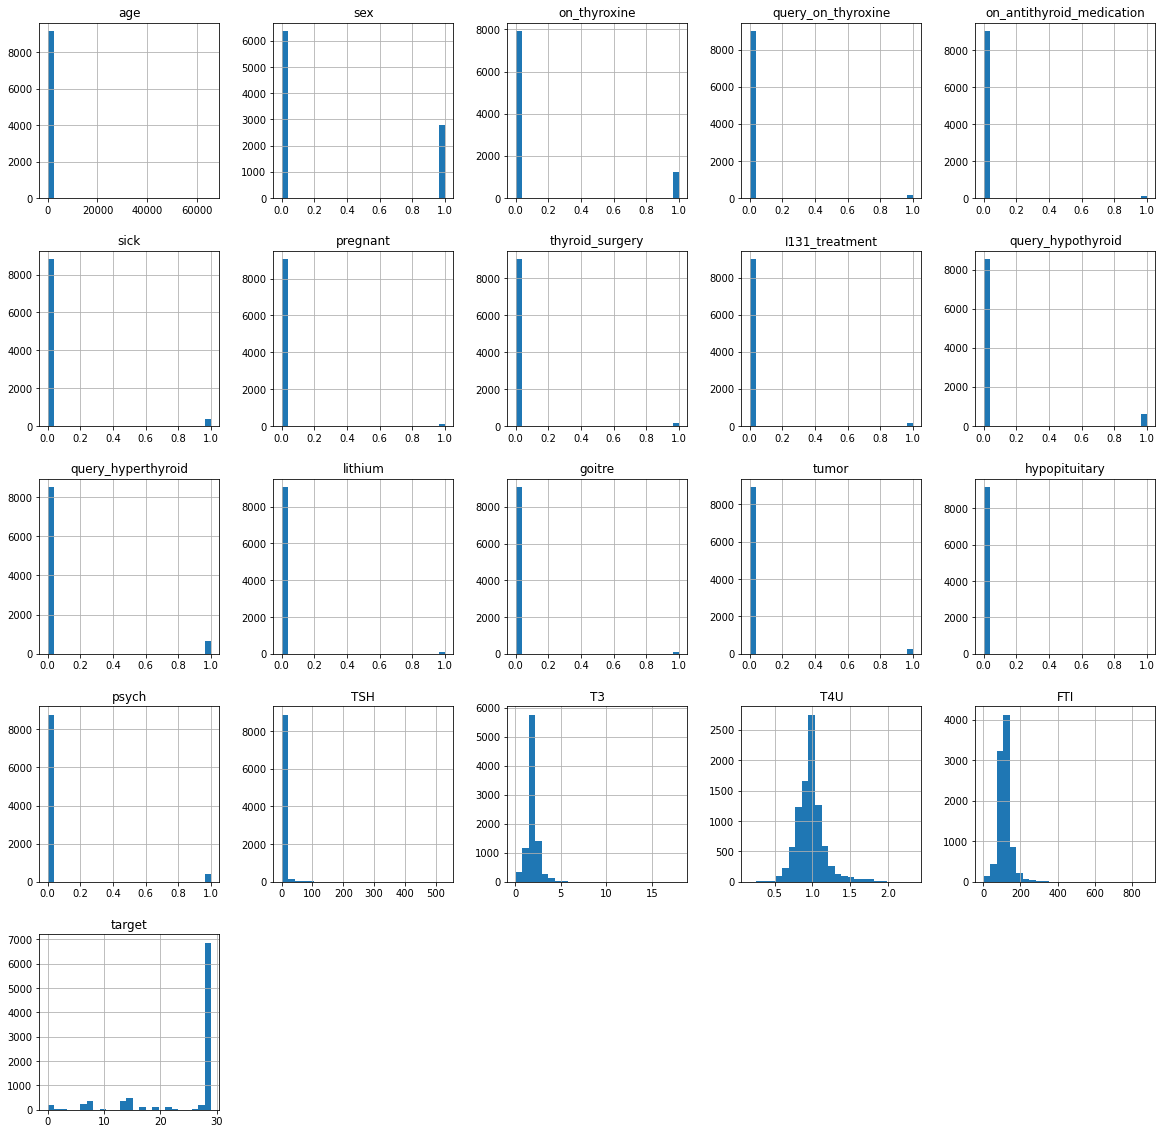

In [ ]:
df.hist(bins=25,figsize=(20,20));

### Now we can see the data normally distributed in some features and some are categorigal now we have to normalize the values 
### because most of the values lies between 0 to 500 in x-axis

# preprocessing techniques

In [464]:
# X and Y split

X = df.drop('target',axis=1)
y = df.target
df2 = X.copy() # for on-going process without PCA

In [465]:
y.unique() # we can see there is 30 types are present => 30 categorigal values

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

# PCA Technique

### First we use PCA then see the result then we move to normal modeling(without PCA)

In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [265]:
x=trf1.fit_transform(X)

In [267]:
x

array([[0.        , 0.        , 0.        , ..., 0.21070234, 0.41018519,
        0.14324693],
       [0.        , 0.        , 0.        , ..., 0.17391304, 0.42407407,
        0.10391087],
       [0.        , 0.        , 0.        , ..., 0.22207358, 0.37962963,
        0.10959527],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18561873, 0.50925926,
        0.09959072],
       [0.        , 0.        , 0.        , ..., 0.12207358, 0.31481481,
        0.09845384],
       [0.        , 0.        , 0.        , ..., 0.10702341, 0.39351852,
        0.07230559]])

In [268]:
v = pca.fit_transform(x)

In [269]:
X_pca = pd.DataFrame(data = v, columns = ['component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10'])


In [270]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-0.270464,-0.181994,-0.100149,-0.029367,-0.036088,-0.048351,-0.059512,-0.044269,-0.010062,-0.019633
1,-0.319395,-0.253168,0.849594,-0.283923,0.060981,0.019776,-0.011126,-0.063314,-0.043230,-0.006802
2,-0.269369,-0.182338,-0.100348,-0.029012,-0.036302,-0.048343,-0.058893,-0.045216,-0.009976,-0.019603
3,-0.269553,-0.184713,-0.101495,-0.027012,-0.036911,-0.048377,-0.062061,-0.044971,-0.008303,-0.020208
4,-0.266771,-0.183604,-0.101852,-0.027543,-0.037198,-0.047854,-0.057035,-0.047870,-0.009622,-0.019470
...,...,...,...,...,...,...,...,...,...,...
9166,0.665597,-0.086977,0.918733,-0.263663,0.015476,0.006971,0.049975,-0.031258,-0.041899,-0.019489
9167,0.711908,-0.015864,-0.029549,-0.010266,-0.080632,-0.061783,-0.001513,-0.008772,-0.008174,-0.032569
9168,0.703889,-0.014940,-0.025923,-0.012991,-0.078343,-0.063480,-0.009793,0.000125,-0.007252,-0.033425
9169,-0.263918,-0.185511,-0.104057,-0.024961,-0.038553,-0.047240,-0.056489,-0.051207,-0.008832,-0.019665


In [313]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

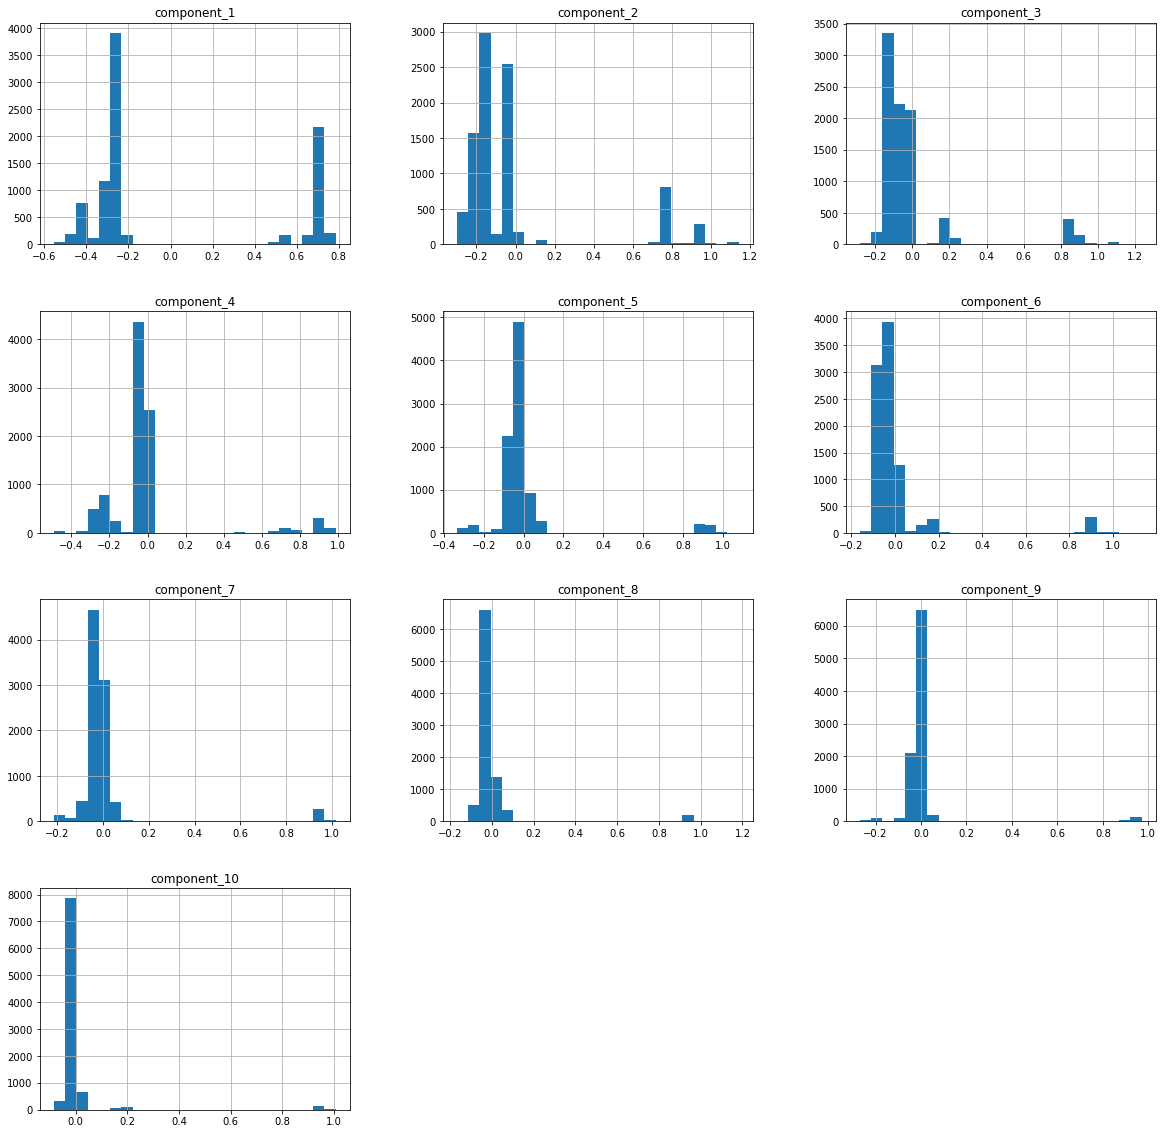

In [271]:
X_pca.hist(bins=25,figsize=(20,20));

In [272]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-0.270464,-0.181994,-0.100149,-0.029367,-0.036088,-0.048351,-0.059512,-0.044269,-0.010062,-0.019633
1,-0.319395,-0.253168,0.849594,-0.283923,0.060981,0.019776,-0.011126,-0.063314,-0.043230,-0.006802
2,-0.269369,-0.182338,-0.100348,-0.029012,-0.036302,-0.048343,-0.058893,-0.045216,-0.009976,-0.019603
3,-0.269553,-0.184713,-0.101495,-0.027012,-0.036911,-0.048377,-0.062061,-0.044971,-0.008303,-0.020208
4,-0.266771,-0.183604,-0.101852,-0.027543,-0.037198,-0.047854,-0.057035,-0.047870,-0.009622,-0.019470
...,...,...,...,...,...,...,...,...,...,...
9166,0.665597,-0.086977,0.918733,-0.263663,0.015476,0.006971,0.049975,-0.031258,-0.041899,-0.019489
9167,0.711908,-0.015864,-0.029549,-0.010266,-0.080632,-0.061783,-0.001513,-0.008772,-0.008174,-0.032569
9168,0.703889,-0.014940,-0.025923,-0.012991,-0.078343,-0.063480,-0.009793,0.000125,-0.007252,-0.033425
9169,-0.263918,-0.185511,-0.104057,-0.024961,-0.038553,-0.047240,-0.056489,-0.051207,-0.008832,-0.019665


In [273]:
len(y.unique())

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [274]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

In [275]:
from sklearn.metrics import accuracy_score

## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)
treepredicttrain = clf.predict(X_train)

In [277]:
accuracy_score(treepredict,y_test)

0.7416584076643541

In [278]:
accuracy_score(treepredicttrain,y_train)

0.7482096354166666

# Random Forest Classifier

In [279]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

0.7403369672943508

# K-NN Classifier

In [280]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
y_pred_train=knnclf.predict(X_train)

In [281]:
accuracy_score(y_pred,y_test)

0.7770069375619425

In [282]:
accuracy_score(y_pred_train,y_train)

0.8629557291666666

# SVM 

In [283]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7373637264618434

# logisitic Regression

In [261]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7608192930294021

# Now we can get clear with usage of PCA and now we will see without PCA

In [463]:
df2

<bound method NDFrame.copy of       age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0      29   F            f                  f                         f    f   
1      41   F            f                  f                         f    f   
2      36   F            f                  f                         f    f   
3      32   F            f                  f                         f    f   
4      60   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
9166   56   M            f                  f                         f    f   
9167   22   M            f                  f                         f    f   
9168   69   M            f                  f                         f    f   
9169   47   F            f                  f                         f    f   
9170   31   M            f                  f                         f    f   

     preg

<AxesSubplot:>

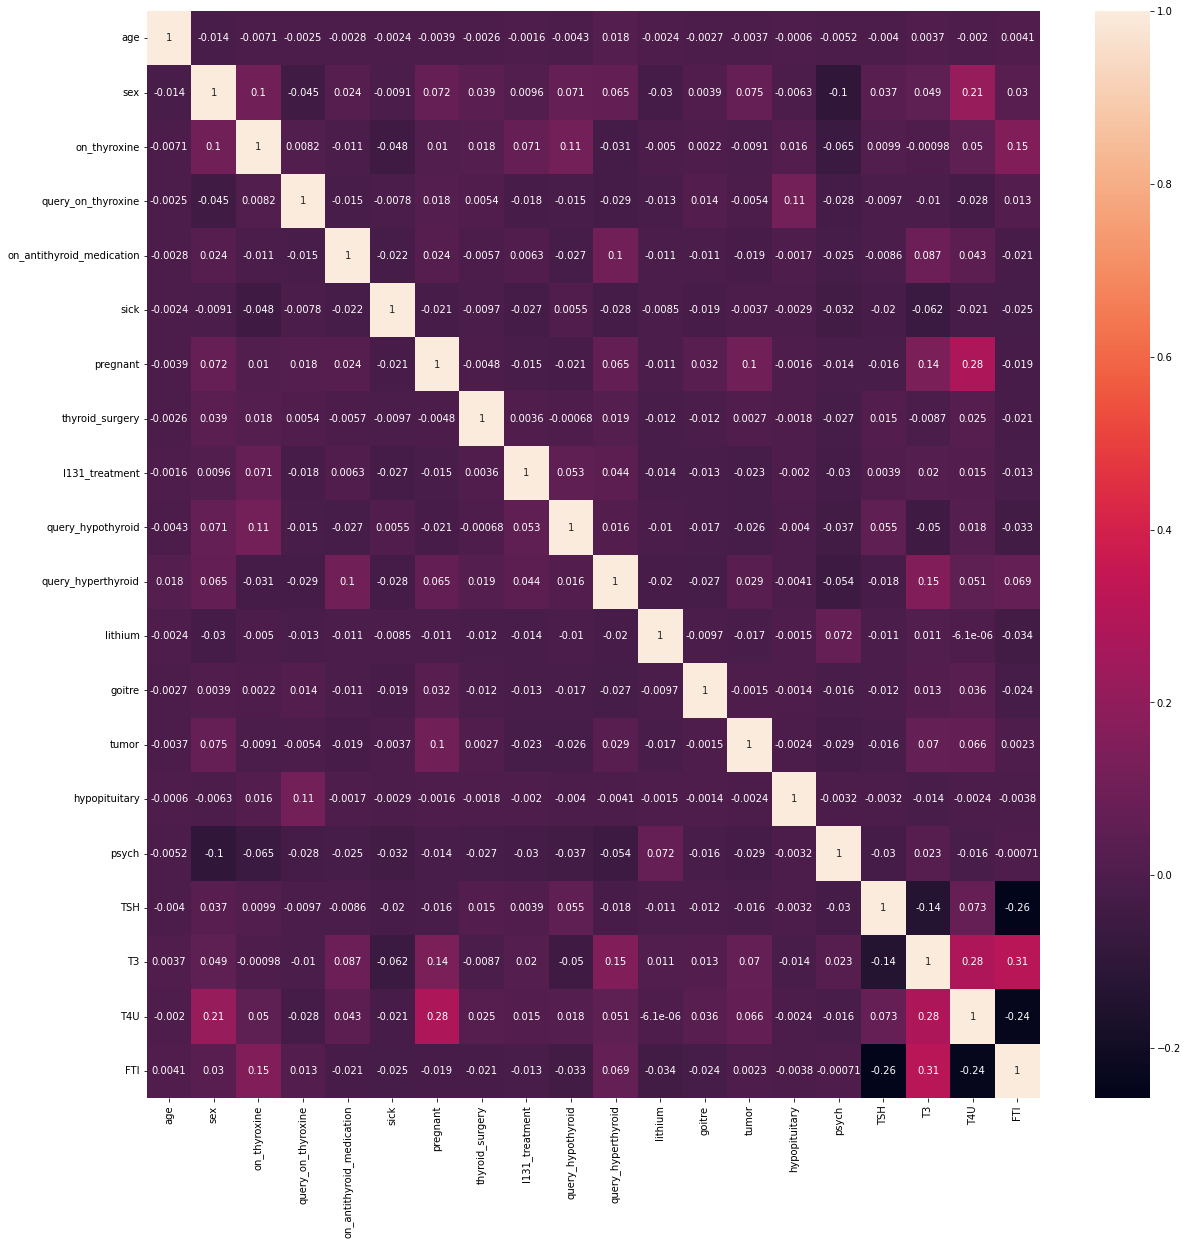

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [466]:
# there is no so much correlation
# now we can normalize the value
for i in df2.columns:
    # print("\n\n")
    print(i)
    print(df2[i].unique())

age
[   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]
sex
['F' 'M' nan]
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
sick
['f' 't']
pregnant
['f' 't']
thyroid_surgery
['f' 't']
I131_treatment
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
tumor
['f' 't']
hypopituitary
['f' 't']
psych
['f' 't']
TSH
[1.6000000e+00           nan 7.0000000e-01 

In [467]:
cols = ['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    df2[i] = scaler.fit_transform(df2[[i]])

ValueError: could not convert string to float: 'F'

In [ ]:
# splitting X and y values

X = df2
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Model Selection

In [300]:
from sklearn.metrics import accuracy_score

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8)
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8916418896597291

In [92]:
y_pred_train=clf.predict(X_train)

In [93]:
accuracy_score(y_pred_train,y_train)

0.92822265625

In [94]:
from sklearn.metrics import f1_score

In [95]:
f1_score(y_pred,y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [312]:
df['target'].value_counts()

Z      6770
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
C        18
MK       16
Q        14
O        14
KJ       11
GI       10
D         9
H         8
FK        6
P         5
MI        2
LJ        1
GKJ       1
OI        1
E         1
Name: target, dtype: int64

# Random Forest Classifier

In [257]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7403369672943508

# K-NN Classifier

In [254]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8110340270895275

In [255]:
y_pred_train = knnclf.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.8834635416666666

# SVM

In [256]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7386851668318467

# Now we can say that with PCA technique we can use KNN because it provides best result as 84% but without PCA with lot of varaible we can use decision tree to get better result you can get some insights by above methods
